### Importing the required modules/packages

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB 

### Loading file and looking into the dimensions of data

In [36]:
raw_data = pd.read_csv("Comedian_NLP.csv")
raw_data.head()

Text   Comedian
0  for you. “There’s no height restriction. “Do y...     Izzard
1  get up off your ass for the baddest bitch: Amy...    Schumer
2  (AUDIENCE CHEERING) (HIP-HOP MUSIC PLAYING) Ph...       Hart
3  Freedom, pass the Emmys pass the People’s Choi...  Degeneres
4  hygiene and germs… there’s another thing… germ...     Carlin

### Running split/test/train on vectorized data

In [44]:
X = raw_data.Text
y = raw_data.Comedian

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
X_train.shape

(2886,)

In [46]:
X_train_dtm.shape

(2886, 3915)

In [47]:
vect = CountVectorizer(lowercase=True)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape
vect.get_feature_names()[-10:]

['yours',
 'yourself',
 'yourselves',
 'yup',
 'yuppy',
 'yusef',
 'zero',
 'zombie',
 'zombies',
 'zuh']

In [48]:
# Vectorize
vect = CountVectorizer(stop_words='english')

# Create matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6656282450674974


In [49]:
#Creating a function to check accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

In [50]:
print((vect.get_stop_words()))

frozenset({'six', 'beforehand', 'un', 'against', 'forty', 'meanwhile', 'though', 'beside', 'where', 'whose', 'the', 'de', 'hundred', 'when', 'per', 'twenty', 'yours', 'anyone', 'part', 'cannot', 'most', 'without', 'thin', 'therein', 'ourselves', 'too', 'from', 'among', 'ltd', 'for', 're', 'amount', 'former', 'whoever', 'not', 'nowhere', 'onto', 'cry', 'elsewhere', 'call', 'some', 'or', 'whereas', 'themselves', 'hasnt', 'wherever', 'me', 'those', 'this', 'to', 'into', 'third', 'go', 'towards', 'thereafter', 'fire', 'would', 'still', 'whereupon', 'between', 'whence', 'it', 'nevertheless', 'ours', 'found', 'now', 'due', 'somewhere', 'fifty', 'first', 'everything', 'three', 'there', 'thereby', 'becomes', 'whom', 'about', 'own', 'empty', 'last', 'am', 'seeming', 'here', 'ten', 'nor', 'namely', 'eleven', 'along', 'within', 'how', 'what', 'also', 'these', 'during', 'enough', 'through', 'five', 'after', 'several', 'seems', 'except', 'he', 'yet', 'himself', 'seemed', 'name', 'done', 'even', 'is

In [16]:
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(2886, 23418)

In [18]:
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)
vect.get_params()

('Features: ', 3915)
('Accuracy: ', 0.6656282450674974)


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
#Use n-grams to increase accuracy
print('1-grams and 2-grams, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

1-grams and 2-grams, up to 100K features:
('Features: ', 23418)
('Accuracy: ', 0.6915887850467289)


In [28]:
#Create wordclouds to reflect the most used words by each comedian
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from urllib.request import urlopen

from bs4 import BeautifulSoup
import requests

import urllib

url_carlin = "https://scrapsfromtheloft.com/2017/04/06/george-carlin-you-are-all-diseased-transcript/"
url_schumer = "https://scrapsfromtheloft.com/2017/06/20/amy-schumer-leather-special-2017-full-transcript/"
url_hart = "https://scrapsfromtheloft.com/2018/01/14/kevin-hart-what-now-2016-full-transcript/"
url_degeneres = "https://scrapsfromtheloft.com/2018/12/22/ellen-degeneres-relatable-transcript/"
url_izzard = "https://scrapsfromtheloft.com/2018/02/22/eddie-izzard-glorious-1997-full-transcript/"

html_carlin = urllib.request.urlopen(url_carlin).read()
html_schumer = urllib.request.urlopen(url_schumer).read()
html_hart = urllib.request.urlopen(url_hart).read()
html_degeneres = urllib.request.urlopen(url_degeneres).read()
html_izzard = urllib.request.urlopen(url_izzard).read()

soup_carlin = BeautifulSoup(html_carlin)
soup_schumer = BeautifulSoup(html_schumer)
soup_hart = BeautifulSoup(html_hart)
soup_degeneres = BeautifulSoup(html_degeneres)
soup_izzard = BeautifulSoup(html_izzard)

# kill all script and style elements
for script in soup_carlin(["script", "style"]):
    script.extract()    # rip it out

for script in soup_schumer(["script", "style"]):
    script.extract() 

for script in soup_hart(["script", "style"]):
    script.extract() 
    
for script in soup_degeneres(["script", "style"]):
    script.extract() 
    
for script in soup_izzard(["script", "style"]):
    script.extract() 

text_carlin = soup_carlin.get_text()
text_schumer = soup_schumer.get_text()
text_hart = soup_hart.get_text()
text_degeneres = soup_degeneres.get_text()
text_izzard = soup_izzard.get_text()

Izzard
Schumer
Hart
Degeneres
Carlin


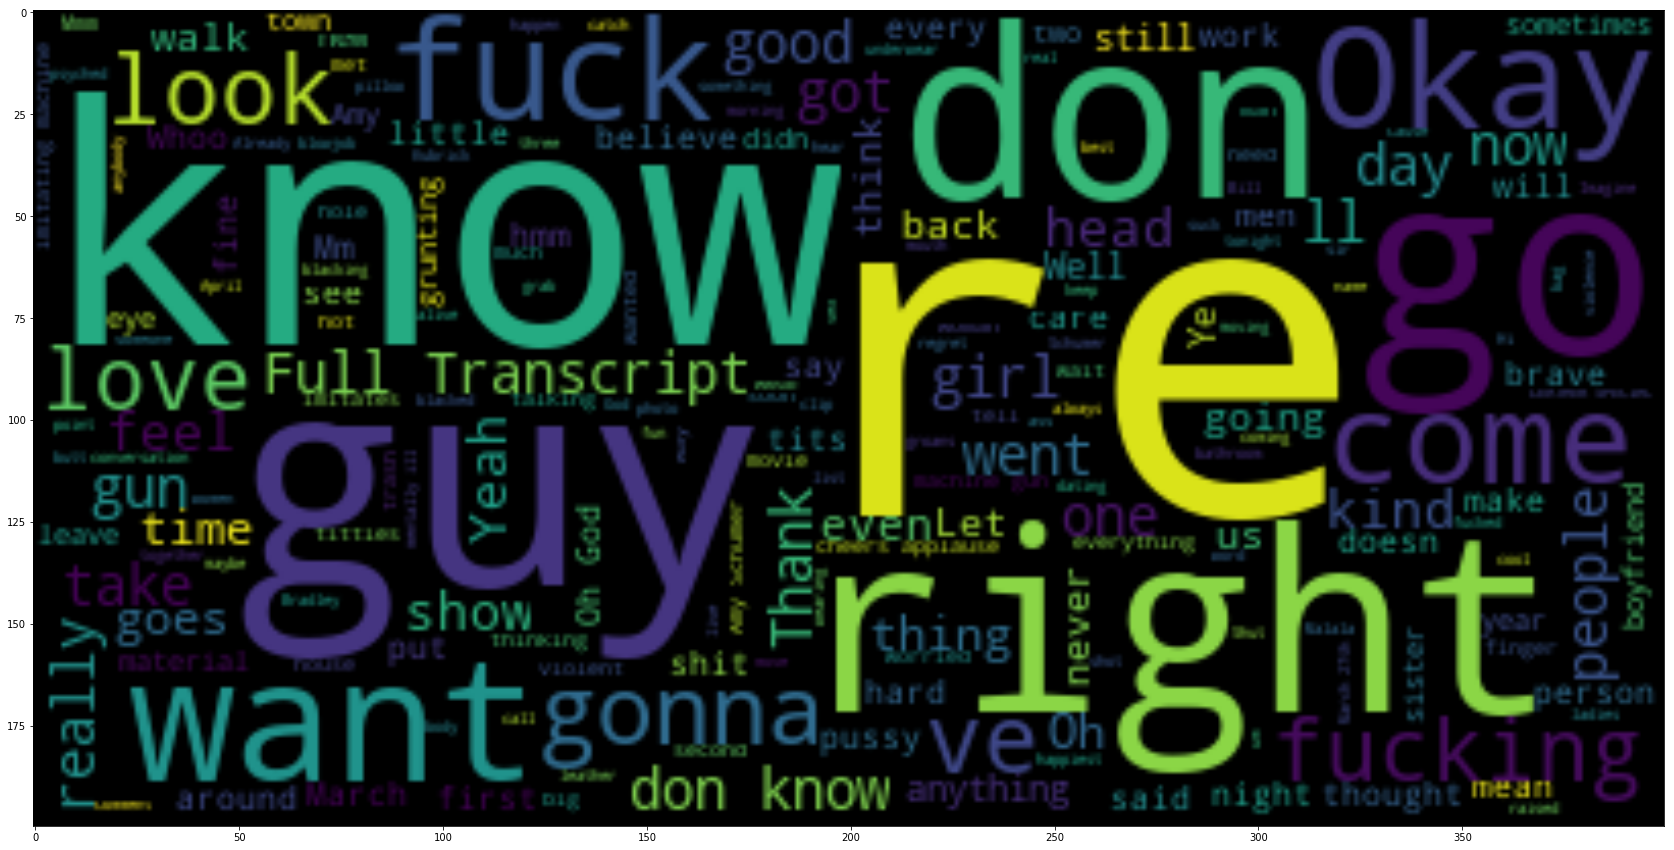

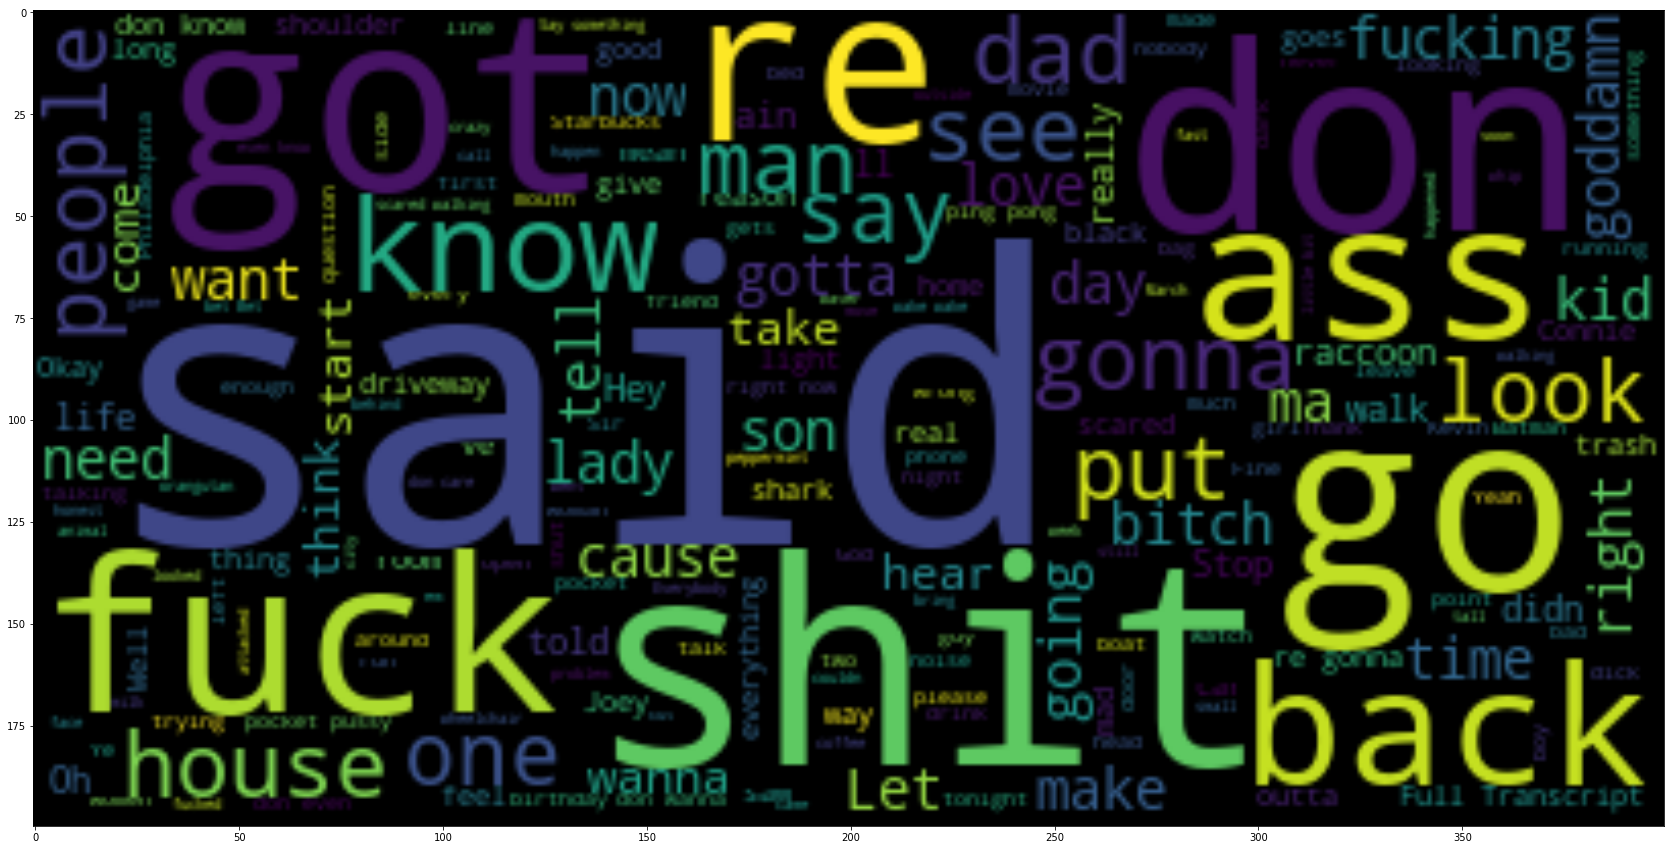

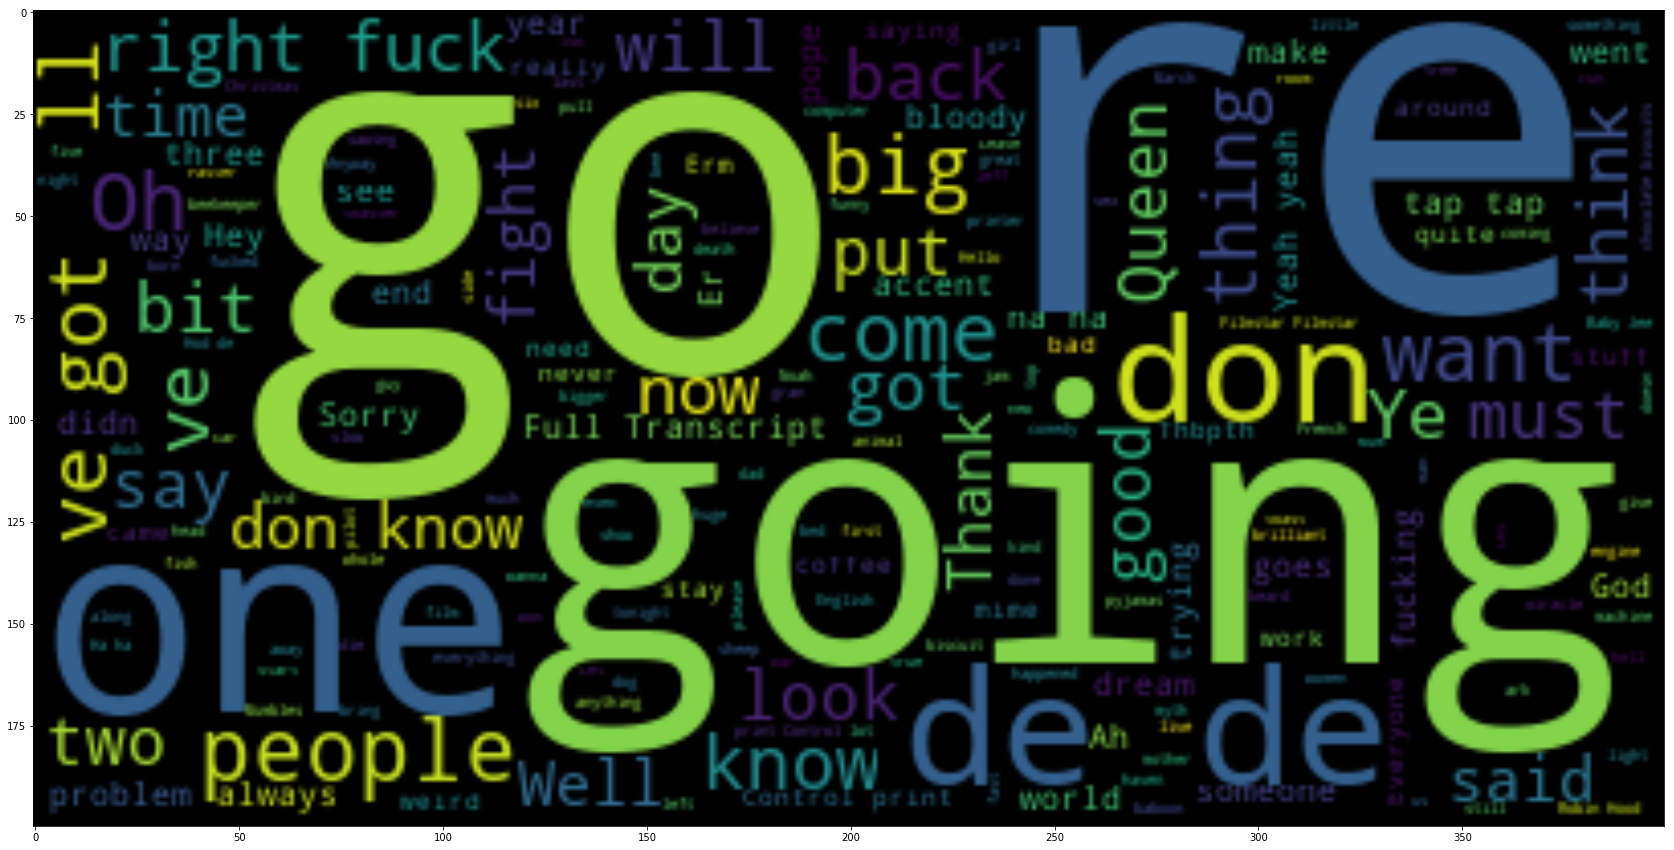

<Figure size 2160x1080 with 0 Axes>

In [51]:
wordcloud1 = WordCloud().generate(text_izzard) # for Izzard
wordcloud2 = WordCloud().generate(text_schumer) # for Schumer
wordcloud3 = WordCloud().generate(text_hart) # for Hart 
wordcloud4 = WordCloud().generate(text_degeneres) # for Degeneres 
wordcloud5 = WordCloud().generate(text_izzard) # for Carlin

print('Izzard')
plt.imshow(wordcloud1, interpolation='bilinear')
plt.figure( figsize=(30,15 ) ).show()


print('Schumer')
plt.imshow(wordcloud2, interpolation='bilinear')
plt.figure( figsize=(30,15 ) ).show()

print('Hart')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.figure( figsize=(30,15 ) ).show()

print('Degeneres')
plt.imshow(wordcloud4, interpolation='bilinear')
plt.figure( figsize=(30,15 ) ).show()

print('Carlin')
plt.imshow(wordcloud5, interpolation='bilinear')
plt.figure( figsize=(30,15 ) ).show()